## Report about Spanish movies

<img src="https://screenrant.com/wp-content/uploads/2016/12/Guillermo-del-Toro-and-the-Faun.jpg" /> 

by [Oksana Palej](https://www.linkedin.com/in/oksana-palej-/)

## Introduction 

In this analysis of Spanish movies, we will import the movies dataset, **movies.csv**, into MongoDB and utilize the `MongoClient` to establish a connection. We will identify the oldest and latest films, determine the total count, explore budget and ratings by genre, and highlight the movie with the highest rating. Through this analysis, we gain insights into the evolution, diversity, and success of Spanish cinema.


#### We will investigate the following points from the dataset:
With the dataset information, do the following:
1. Get the first 4 movies from the dataset movies.csv
2. Obtain the initial set of five Spanish movies
3. Retrieve and Print the First 5 Spanish Movies
4. Oldest and Newest Spanish Movies Query
5. Total Number of Spanish Movies Query
6. Number of Spanish Movies Since 2000 Query
7. Total Budget of Spanish Movies Calculation
8. Total Budget of Spanish Movies from 2000 Calculation
9. Identify Movies with Empty Budget Values and Movie Titles
10. Count Spanish movies with emppty budget values
11. Count the total number of movies that meet the previous criteria
12. Getting the total count of Spanish movies by genre
13. Getting the average Score of Spanish Movies by Genre

In [21]:
# importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from pymongo import MongoClient
import csv
import warnings
warnings.filterwarnings("ignore")

In [22]:
#We connect to the database
client = MongoClient("mongodb://localhost:27017")
db = client.Project
collection = db.Movie

In [23]:
# Importing movies from CSV to MongoDB
with open('movies.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        document = {}
        for field in reader.fieldnames:
            document[field] = row[field]
        collection.insert_one(document)


1. Get the first 4 movies from the dataset **movies.csv**

In [24]:
# Get the first 4 movies from the collection
movies = collection.find().limit(4)

# Print the movies
for movie in movies:
    print(movie)


{'_id': ObjectId('648bb1a21eb4f50551c472cb'), 'name': 'The Shining', 'rating': 'R', 'genre': 'Drama', 'year': '1980', 'released': 'June 13, 1980 (United States)', 'score': '8.4', 'votes': '927000.0', 'director': 'Stanley Kubrick', 'writer': 'Stephen King', 'star': 'Jack Nicholson', 'country': 'United Kingdom', 'budget': '19000000.0', 'gross': '46998772.0', 'company': 'Warner Bros.', 'runtime': '146.0'}
{'_id': ObjectId('648bb1a21eb4f50551c472cc'), 'name': 'The Blue Lagoon', 'rating': 'R', 'genre': 'Adventure', 'year': '1980', 'released': 'July 2, 1980 (United States)', 'score': '5.8', 'votes': '65000.0', 'director': 'Randal Kleiser', 'writer': 'Henry De Vere Stacpoole', 'star': 'Brooke Shields', 'country': 'United States', 'budget': '4500000.0', 'gross': '58853106.0', 'company': 'Columbia Pictures', 'runtime': '104.0'}
{'_id': ObjectId('648bb1a21eb4f50551c472cd'), 'name': 'Star Wars: Episode V - The Empire Strikes Back', 'rating': 'PG', 'genre': 'Action', 'year': '1980', 'released': 'J

2. Obtain the initial set of five Spanish movies

In [25]:
# Query Spanish movies
query = {"country": "Spain"}

# Retrieve the first 5 Spanish movies
movies = collection.find(query).limit(5)

# Print the movies
for movie in movies:
    print(movie)


{'_id': ObjectId('648bb1a31eb4f50551c473b8'), 'name': 'Pieces', 'rating': 'Not Rated', 'genre': 'Horror', 'year': '1982', 'released': 'September 23, 1983 (United States)', 'score': '6.1', 'votes': '9300.0', 'director': 'Juan Piquer Simón', 'writer': 'Dick Randall', 'star': 'Christopher George', 'country': 'Spain', 'budget': '300000.0', 'gross': '2032311.0', 'company': 'Almena Films', 'runtime': '85.0'}
{'_id': ObjectId('648bb1a31eb4f50551c47669'), 'name': 'Matador', 'rating': 'NC-17', 'genre': 'Drama', 'year': '1986', 'released': 'March 7, 1986 (Spain)', 'score': '7.0', 'votes': '11000.0', 'director': 'Pedro Almodóvar', 'writer': 'Pedro Almodóvar', 'star': 'Assumpta Serna', 'country': 'Spain', 'budget': '', 'gross': '286126.0', 'company': 'Compañía Iberoamericana de TV', 'runtime': '110.0'}
{'_id': ObjectId('648bb1a31eb4f50551c47798'), 'name': 'Anguish', 'rating': 'R', 'genre': 'Horror', 'year': '1987', 'released': 'January 8, 1988 (United States)', 'score': '6.7', 'votes': '3500.0', '

3. Retrieve and Print the First 5 Spanish Movies

In [26]:
# Query for Spanish movies
query = {"country": "Spain"}

# Get the first 5 Spanish movies
movies = collection.find(query).limit(5)

# Print the movies
for movie in movies:
    print(movie)


{'_id': ObjectId('648bb1a31eb4f50551c473b8'), 'name': 'Pieces', 'rating': 'Not Rated', 'genre': 'Horror', 'year': '1982', 'released': 'September 23, 1983 (United States)', 'score': '6.1', 'votes': '9300.0', 'director': 'Juan Piquer Simón', 'writer': 'Dick Randall', 'star': 'Christopher George', 'country': 'Spain', 'budget': '300000.0', 'gross': '2032311.0', 'company': 'Almena Films', 'runtime': '85.0'}
{'_id': ObjectId('648bb1a31eb4f50551c47669'), 'name': 'Matador', 'rating': 'NC-17', 'genre': 'Drama', 'year': '1986', 'released': 'March 7, 1986 (Spain)', 'score': '7.0', 'votes': '11000.0', 'director': 'Pedro Almodóvar', 'writer': 'Pedro Almodóvar', 'star': 'Assumpta Serna', 'country': 'Spain', 'budget': '', 'gross': '286126.0', 'company': 'Compañía Iberoamericana de TV', 'runtime': '110.0'}
{'_id': ObjectId('648bb1a31eb4f50551c47798'), 'name': 'Anguish', 'rating': 'R', 'genre': 'Horror', 'year': '1987', 'released': 'January 8, 1988 (United States)', 'score': '6.7', 'votes': '3500.0', '

4. Oldest and Newest Spanish Movies Query

In [27]:
# Query the oldest and newest Spanish movies
pipeline = [
    {"$match": {"country": "Spain"}},
    {"$group": {
        "_id": "$country",
        "oldest_movie": {"$min": "$year"},
        "newest_movie": {"$max": "$year"}
    }}
]

# Execute the aggregation operation
result = list(collection.aggregate(pipeline))

# Get the oldest and newest Spanish movies
oldest_movie = result[0]["oldest_movie"] if result else None
newest_movie = result[0]["newest_movie"] if result else None

# Print the results
print("Oldest Spanish movie:", oldest_movie)
print("Newest Spanish movie:", newest_movie)


Oldest Spanish movie: 1982
Newest Spanish movie: 2019


5. Total Number of Spanish Movies Query

In [28]:
# Query the total number of Spanish movies
total_movies = collection.count_documents({"country": "Spain"})

# Print the result
print("Total Spanish movies:", total_movies)


Total Spanish movies: 188


6. Number of Spanish Movies Since 2000 Query

In [29]:
# Query the number of Spanish movies since 2000
query = {
    "country": "Spain",
    "year": {"$gte": "2000"}
}

# Count the number of movies
count = collection.count_documents(query)

# Print the result
print("Total number of Spanish movies since 2000:", count)

Total number of Spanish movies since 2000: 124


7. Total Budget of Spanish Movies Calculation

In [30]:
# Calculate the total budget of Spanish movies excluding empty values
pipeline = [
    {"$match": {"country": "Spain", "budget": {"$ne": ""}}},
    {"$group": {"_id": None, "total_budget": {"$sum": {"$toDouble": "$budget"}}}}
]
result = list(collection.aggregate(pipeline))
total_budget = result[0]["total_budget"] if result else 0

# Print the total budget of Spanish movies
print("Total budget of Spanish movies:", total_budget)

Total budget of Spanish movies: 1580800000.0


8. Total Budget of Spanish Movies from 2000 Calculation

In [31]:
# Calculate the total budget of Spanish movies from the year 2000 excluding empty values
pipeline = [
    {"$match": {"country": "Spain", "year": {"$gte": "2000"}, "budget": {"$ne": ""}}},
    {"$group": {"_id": None, "total_budget": {"$sum": {"$toDouble": "$budget"}}}}
]
result = list(collection.aggregate(pipeline))
total_budget = result[0]["total_budget"] if result else 0

# Print the total budget of Spanish movies from the year 2000
print("Total budget of Spanish movies from the year 2000:", total_budget)


Total budget of Spanish movies from the year 2000: 1576800000.0


9. Identify Movies with Empty Budget Values and Movie Titles

In [32]:
from pymongo import MongoClient

# Establish a connection to the MongoDB database
client = MongoClient("mongodb://localhost:27017")
db = client["Project"]
collection = db["Movies"]

# Find movies with empty budget values and a movie title
query = {"budget": "", "name": {"$exists": True}}
projection = {"name": 1, "year": 1}

# Retrieve the movies with empty budget values and their title and year of creation
movies = collection.find(query, projection)
for movie in movies:
    print("Movie Title:", movie["name"])
    print("Year of Creation:", movie["year"])
    print()


Movie Title: Fame
Year of Creation: 1980

Movie Title: Stir Crazy
Year of Creation: 1980

Movie Title: Urban Cowboy
Year of Creation: 1980

Movie Title: Altered States
Year of Creation: 1980

Movie Title: Little Darlings
Year of Creation: 1980

Movie Title: My Bodyguard
Year of Creation: 1980

Movie Title: Prom Night
Year of Creation: 1980

Movie Title: Smokey and the Bandit II
Year of Creation: 1980

Movie Title: Seems Like Old Times
Year of Creation: 1980

Movie Title: The Jazz Singer
Year of Creation: 1980

Movie Title: Coal Miner's Daughter
Year of Creation: 1980

Movie Title: The Watcher in the Woods
Year of Creation: 1980

Movie Title: Breaker Morant
Year of Creation: 1980

Movie Title: Where the Buffalo Roam
Year of Creation: 1980

Movie Title: The Awakening
Year of Creation: 1980

Movie Title: Cheech and Chong's Next Movie
Year of Creation: 1980

Movie Title: City of Women
Year of Creation: 1980

Movie Title: The Private Eyes
Year of Creation: 1980

Movie Title: Herbie Goes Ban

In [33]:
# Count the movies with empty budget values and a movie title
query = {"budget": "", "name": {"$exists": True}}
total_movies = collection.count_documents(query)

# Print the total count
print("Total number of movies with empty budget ", total_movies)


Total number of movies with empty budget  3909


10. Count Spanish movies with emppty budget values

In [34]:
# Find movies from Spain with empty budget values and a movie title
query = {"budget": "", "name": {"$exists": True}, "country": "Spain"}
projection = {"name": 1, "year": 1}

# Retrieve the movies with empty budget values, their title, and year of creation
movies = collection.find(query, projection)
for movie in movies:
    print("Movie Title:", movie["name"])
    print("Year of Creation:", movie["year"])
    print()


Movie Title: Matador
Year of Creation: 1986

Movie Title: Anguish
Year of Creation: 1987

Movie Title: Tie Me Up! Tie Me Down!
Year of Creation: 1989

Movie Title: High Heels
Year of Creation: 1991

Movie Title: Matador
Year of Creation: 1986

Movie Title: Anguish
Year of Creation: 1987

Movie Title: Tie Me Up! Tie Me Down!
Year of Creation: 1989

Movie Title: High Heels
Year of Creation: 1991

Movie Title: Matador
Year of Creation: 1986

Movie Title: Anguish
Year of Creation: 1987

Movie Title: Tie Me Up! Tie Me Down!
Year of Creation: 1989

Movie Title: High Heels
Year of Creation: 1991

Movie Title: Lovers: A True Story
Year of Creation: 1991

Movie Title: Jamón, Jamón
Year of Creation: 1992

Movie Title: Belle Epoque
Year of Creation: 1992

Movie Title: Kika
Year of Creation: 1993

Movie Title: The Day of the Beast
Year of Creation: 1995

Movie Title: The Flower of My Secret
Year of Creation: 1995

Movie Title: Open Your Eyes
Year of Creation: 1997

Movie Title: Live Flesh
Year of 

11. Count the total number of movies that meet the previous criteria

In [35]:
# Query the total number of movies from Spain with empty budget 
query = {"budget": "", "name": {"$exists": True}, "country": "Spain"}
total_movies = collection.count_documents(query)

# Print the total number of movies
print("Total number of movies that meet the criteria:", total_movies)


Total number of movies that meet the criteria: 37


12. Getting the total count of Spanish movies by genre.

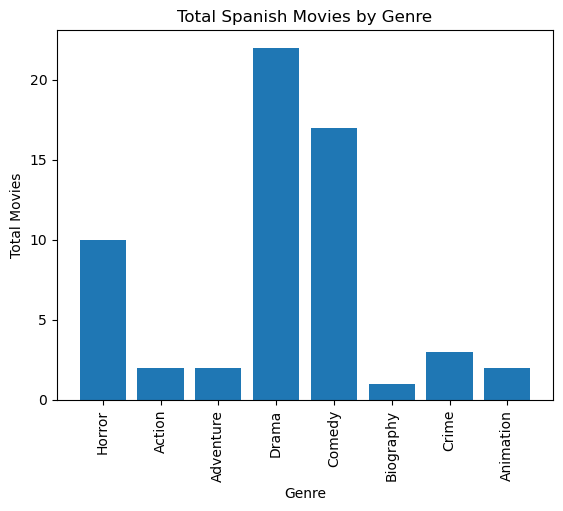

In [36]:
# Query Spanish movies and count the total for each genre
pipeline = [
    {"$match": {"country": "Spain"}},
    {"$group": {"_id": "$genre", "count": {"$sum": 1}}}
]
result = list(collection.aggregate(pipeline))

# Extract genres and counts from the result
genres = [r["_id"] for r in result]
counts = [r["count"] for r in result]

# Create a bar chart
plt.bar(genres, counts)
plt.xlabel("Genre")
plt.ylabel("Total Movies")
plt.title("Total Spanish Movies by Genre")
plt.xticks(rotation=90)
plt.show()


13. Getting the average Score of Spanish Movies by Genre

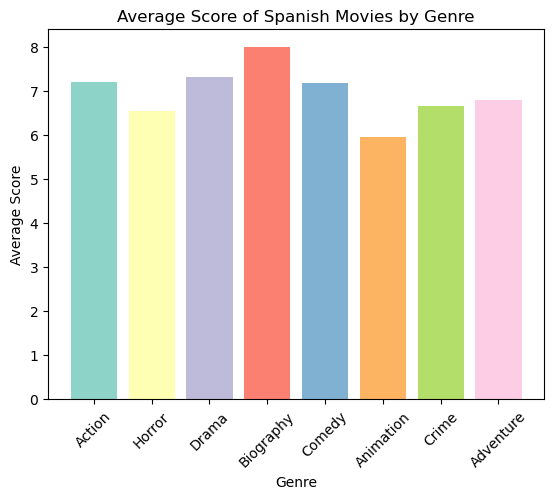

In [37]:
# Query Spanish movies and retrieve the score by genre
pipeline = [
    {"$match": {"country": "Spain", "score": {"$exists": True}}},
    {"$group": {"_id": "$genre", "scores": {"$push": {"$toDouble": "$score"}}}}
]
result = list(collection.aggregate(pipeline))

# Extract genres and scores from the result
genres = [r["_id"] for r in result]
scores = [r["scores"] for r in result]

# Calculate the average scores by genre
averages = [np.mean(s) for s in scores]

# Create a color palette
colors = plt.cm.get_cmap("Set3")

# Create the bar chart with different colors
plt.bar(genres, averages, color=colors(np.arange(len(genres))))

plt.xlabel("Genre")
plt.ylabel("Average Score")
plt.title("Average Score of Spanish Movies by Genre")
plt.xticks(rotation=45)

plt.show()


14. Getting the Spanish movie with the highest score

In [38]:
# Query the Spanish movie with the highest score
pipeline = [
    {"$match": {"country": "Spain", "score": {"$exists": True}}},
    {"$sort": {"score": -1, "votes": -1}},
    {"$limit": 1},
    {"$project": {"_id": 0, "title": "$name", "director": "$director", "score": "$score"}}
]
result = list(collection.aggregate(pipeline))

# Display the title of the movie, the director's name, and the score
if result:
    movie = result[0]
    print("Movie Title:", movie["title"])
    print("Director:", movie["director"])
    print("Score:", movie["score"])
else:
    print("No Spanish movies found with score.")


Movie Title: Pan's Labyrinth
Director: Guillermo del Toro
Score: 8.2


15. Let's observe all the keys and their values of the movie that meets the requirements.

In [39]:
# Query the Spanish movie with the highest score and greatest number of votes
pipeline = [
    {"$match": {"country": "Spain", "score": {"$exists": True}, "votes": {"$exists": True}}},
    {"$sort": {"score": -1, "votes": -1}},
    {"$limit": 1}
]
result = list(collection.aggregate(pipeline))

# Display all the information of the movie
if result:
    movie = result[0]
    for key, value in movie.items():
        print(key + ":", value)
else:
    print("No Spanish movies found with score and votes.")


_id: 648ab6bbd79a27199d545fee
name: Pan's Labyrinth
rating: R
genre: Drama
year: 2006
released: January 19, 2007 (United States)
score: 8.2
votes: 631000.0
director: Guillermo del Toro
writer: Guillermo del Toro
star: Ivana Baquero
country: Spain
budget: 19000000.0
gross: 83850267.0
company: Estudios Picasso
runtime: 118.0


## Summary  

In this data analysis of Spanish movies, our goal was to understand the preferred genre of Spanish movies among the Spanish audience. By analyzing the dataset, we discovered interesting insights. Firstly, we found that movies with higher scores and viewer ratings tended to have larger budgets, indicating that higher production values contribute to better reception. 

Moreover, through our analysis of genre preferences, we observed that Spanish movies in the biography genre received the highest ratings compared to movies in the drama, comedy, and action genres. This suggests that Spanish filmmakers excel in creating compelling biographical films that resonate with the audience.

Overall, our analysis provides valuable insights into the taste and preferences of Spanish moviegoers. By understanding the genres that receive better ratings and the relationship between budget and movie success, filmmakers and industry professionals can make informed decisions when producing and promoting Spanish movies.